In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Prepare the data
data_actual=pd.read_csv('../../Data/Actuals.csv')
data_actual = data_actual.drop(columns='TICKER')

In [3]:
data_actual.head(100)

,OFTIC,CNAME,PENDS,MEASURE,PDICITY,ANNDATS,VALUE
0,PAYC,PAYCOM SOFTWARE,2014-06-30,EPS,QTR,2014-08-05,0.04
1,PAYC,PAYCOM SOFTWARE,2014-09-30,EPS,QTR,2014-11-04,0.05
2,PAYC,PAYCOM SOFTWARE,2014-12-31,EPS,QTR,2015-02-10,0.06
3,PAYC,PAYCOM SOFTWARE,2015-03-31,EPS,QTR,2015-05-06,0.12
4,PAYC,PAYCOM SOFTWARE,2015-06-30,EPS,QTR,2015-08-04,0.10
...,...,...,...,...,...,...,...
95,KEYS,KEYSIGHT TECH,2020-10-31,EPS,QTR,2020-11-18,1.62
96,KEYS,KEYSIGHT TECH,2021-01-31,EPS,QTR,2021-02-18,1.43
97,KEYS,KEYSIGHT TECH,2021-04-30,EPS,QTR,2021-05-19,1.44
98,KEYS,KEYSIGHT TECH,2021-07-31,EPS,QTR,2021-08-18,1.54


In [4]:
# For Actual

missing_values_actual = data_actual.isnull()

# Count missing values and display
for column in data_actual.columns:
    missing_count = missing_values_actual[column].sum()
    print(f"Column '{column}' has {missing_count} missing values.")

Column 'OFTIC' has 0 missing values.
Column 'CNAME' has 0 missing values.
Column 'PENDS' has 0 missing values.
Column 'MEASURE' has 0 missing values.
Column 'PDICITY' has 0 missing values.
Column 'ANNDATS' has 0 missing values.
Column 'VALUE' has 162651 missing values.


In [5]:
# Number of unique measure
len(data_actual['MEASURE'].unique())

22

In [6]:
# For Actual check quarter and value

data_actual['PENDS'] = pd.to_datetime(data_actual['PENDS'])

min_date_actual = data_actual.groupby(['OFTIC', 'MEASURE'])['PENDS'].min().reset_index().sort_values(by='PENDS', ascending=False)

#filtered_data = data_actual.groupby(['OFTIC', 'MEASURE'])['PENDS'].min().reset_index()


#filtered_data
min_date_actual

,OFTIC,MEASURE,PENDS
4362,GEHC,SAL,2023-03-31
4352,GEHC,FFO,2023-03-31
4342,GEHC,BPS,2023-03-31
4343,GEHC,CPS,2023-03-31
4344,GEHC,CPX,2023-03-31
...,...,...,...
10645,WM,NET,2008-09-30
10646,WM,OPR,2008-09-30
10650,WM,SAL,2008-09-30
10649,WM,ROE,2008-09-30


In [7]:
filtered_df = min_date_actual[min_date_actual['PENDS'] > '2015-01-01']
len(filtered_df)

1064

In [8]:
# The function which is getting the date and giving the companies as a series
def companies_by_pends(date, df):
    min_pends = data_actual.groupby(['OFTIC', 'MEASURE'])['PENDS'].min().reset_index().sort_values(by='PENDS', ascending=False)
    min_pends_by_date = min_pends[min_pends['PENDS'] <= date]
    
    companies_by_date = min_pends_by_date['OFTIC'].unique()
    return pd.Series(companies_by_date)

In [9]:
companies_by_pends('2015-01-01', data_actual)

0      INTC
1       WST
2       IBM
3       ICE
4       IEX
       ... 
449     HST
450     HON
451     HES
452      BA
453     STZ
Length: 454, dtype: object

In [10]:
# Convert 'PENDS' to datetime
data_actual['PENDS'] = pd.to_datetime(data_actual['PENDS'])

# Filter rows where 'PENDS' is greater than or equal to '2015-01-01'
data_actual = data_actual[data_actual['PENDS'] >= '2015-01-01']

# Now, data_actual contains only rows with 'PENDS' on or after '2015-01-01'

In [11]:
# Check for missing values in the DataFrame
missing_values_actual = data_actual.isnull()

# Create a boolean mask that identifies rows with one or more missing values
rows_with_missing_values = missing_values_actual.any(axis=1)

# Filter the DataFrame to include only rows with missing values
rows_with_missing_values_df = data_actual[rows_with_missing_values]

# Save the filtered DataFrame to a new CSV file
rows_with_missing_values_df.to_csv('missing_values.csv', index=False)

In [12]:
# List of measure names
measure_names = [
    "EPS", "BPS", "CPS", "CPX", "CSH", "DPS", "EBG", "EBI", "EBS", "EBT",
    "ENT", "EPX", "FFO", "GPS", "GRM", "NAV", "NDT", "NET", "OPR", "PRE",
    "ROA", "ROE", "SAL"
]

# Check for missing values for each measure name
missing_values_counts = {}

for measure in measure_names:
    missing_count = data_actual[data_actual['MEASURE'] == measure]['VALUE'].isnull().sum()
    missing_values_counts[measure] = missing_count

# Print the number of missing values for each measure
print("Number of missing values for each measure:")
for measure, count in missing_values_counts.items():
    print(f"{measure}: {count}")


Number of missing values for each measure:
EPS: 22
BPS: 1269
CPS: 1903
CPX: 2165
CSH: 15710
DPS: 1828
EBG: 2010
EBI: 560
EBS: 7035
EBT: 1766
ENT: 14262
EPX: 0
FFO: 14907
GPS: 54
GRM: 4521
NAV: 630
NDT: 3172
NET: 72
OPR: 15220
PRE: 734
ROA: 10623
ROE: 5152
SAL: 35


In [13]:
# List of measures to be dropped
measures_to_drop = ['CSH', 'ENT', 'FFO', 'OPR', 'ROA']

# Filter out rows containing specific measures
data_actual = data_actual[~data_actual['MEASURE'].isin(measures_to_drop)]

# Display the updated DataFrame after dropping the specified measures

In [14]:
for measure in measure_names:
    missing_count = data_actual[data_actual['MEASURE'] == measure]['VALUE'].isnull().sum()
    missing_values_counts[measure] = missing_count

for measure, count in missing_values_counts.items():
    print(f"{measure}: {count}")

EPS: 22
BPS: 1269
CPS: 1903
CPX: 2165
CSH: 0
DPS: 1828
EBG: 2010
EBI: 560
EBS: 7035
EBT: 1766
ENT: 0
EPX: 0
FFO: 0
GPS: 54
GRM: 4521
NAV: 630
NDT: 3172
NET: 72
OPR: 0
PRE: 734
ROA: 0
ROE: 5152
SAL: 35


In [15]:
# Count missing values (NaN) for each company ('OFTIC')
missing_values = data_actual.drop('OFTIC', axis=1).isnull().groupby(data_actual['OFTIC']).sum()

# Display total count of missing measures for each company ('OFTIC')
print("Total count of missing measures for each company:")
print(missing_values)

Total count of missing measures for each company:
       CNAME  PENDS  MEASURE  PDICITY  ANNDATS  VALUE
OFTIC                                                
A          0      0        0        0        0     18
AAL        0      0        0        0        0     56
AAP        0      0        0        0        0     13
AAPL       0      0        0        0        0      8
ABBV       0      0        0        0        0     93
...      ...    ...      ...      ...      ...    ...
YUM        0      0        0        0        0     13
ZBH        0      0        0        0        0     33
ZBRA       0      0        0        0        0    122
ZION       0      0        0        0        0    168
ZTS        0      0        0        0        0     98

[502 rows x 6 columns]


In [16]:
# Filter and display companies with more than 500 missing values
companies_with_over_500_missing = missing_values[missing_values.sum(axis=1) > 500]

print("Companies with more than 500 missing values:")
print(companies_with_over_500_missing)

Companies with more than 500 missing values:
Empty DataFrame
Columns: [CNAME, PENDS, MEASURE, PDICITY, ANNDATS, VALUE]
Index: []


In [17]:
# Convert 'PENDS' column to datetime
data_actual['PENDS'] = pd.to_datetime(data_actual['PENDS'])

# Define a function to extract the month and map it to quarters
def get_quarter(month):
    if 2 <= month <= 4:
        return 'Q1'
    elif 5 <= month <= 7:
        return 'Q2'
    elif 8 <= month <= 10:
        return 'Q3'
    else:  # For months 11, 12 and 1
        return 'Q4'

# Create a new 'Quarter' column based on the month extracted from 'PENDS'
data_actual['Quarter'] = data_actual['PENDS'].dt.month.apply(get_quarter)

# Display the updated DataFrame with the 'Quarter' column
print(data_actual)

       OFTIC            CNAME      PENDS MEASURE PDICITY     ANNDATS  \
3       PAYC  PAYCOM SOFTWARE 2015-03-31     EPS     QTR  2015-05-06   
4       PAYC  PAYCOM SOFTWARE 2015-06-30     EPS     QTR  2015-08-04   
5       PAYC  PAYCOM SOFTWARE 2015-09-30     EPS     QTR  2015-11-03   
6       PAYC  PAYCOM SOFTWARE 2015-12-31     EPS     QTR  2016-02-09   
7       PAYC  PAYCOM SOFTWARE 2016-03-31     EPS     QTR  2016-05-03   
...      ...              ...        ...     ...     ...         ...   
519499   TJX              TJX 2022-04-30     SAL     QTR  2022-05-18   
519500   TJX              TJX 2022-07-31     SAL     QTR  2022-08-17   
519501   TJX              TJX 2022-10-31     SAL     QTR  2022-11-16   
519502   TJX              TJX 2023-01-31     SAL     QTR  2023-02-22   
519503   TJX              TJX 2023-04-30     SAL     QTR  2023-05-17   

            VALUE Quarter  
3           0.120      Q1  
4           0.100      Q2  
5           0.080      Q3  
6           0.100      

In [18]:
# Group by 'Quarter' and 'PENDS', count missing values (NaN)
missing_values_by_date = data_actual.drop(['OFTIC'], axis=1).isnull().groupby([data_actual['Quarter'].astype(str), data_actual['PENDS'].dt.to_period('Q').astype(str)]).sum()

# Find the top 10 dates with the most missing values
top_10_dates_missing = missing_values_by_date.sum(axis=1).nlargest(10)

print("Top 10 dates with the most missing values:")
for date in top_10_dates_missing.index:
    quarter, year = date
    missing_values_count = missing_values_by_date.loc[date].sum()
    print(f"Quarter: {quarter} ||| Missing Values: {missing_values_count}")


Top 10 dates with the most missing values:
Quarter: Q1 ||| Missing Values: 1675
Quarter: Q1 ||| Missing Values: 1470
Quarter: Q2 ||| Missing Values: 1394
Quarter: Q3 ||| Missing Values: 1381
Quarter: Q4 ||| Missing Values: 1358
Quarter: Q1 ||| Missing Values: 1115
Quarter: Q3 ||| Missing Values: 1077
Quarter: Q1 ||| Missing Values: 983
Quarter: Q2 ||| Missing Values: 964
Quarter: Q4 ||| Missing Values: 947


In [19]:
total_quarters = data_actual['Quarter'].nunique()
total_quarters
print("average missing value per quarter",32928/34)

average missing value per quarter 968.4705882352941


In [20]:
# Count total missing values in the entire DataFrame
total_missing_values = data_actual.isnull().sum().sum()

print(f"Total number of missing values in the DataFrame: {total_missing_values}")

Total number of missing values in the DataFrame: 32928


In [21]:
# Calculate average number of missing values per date
average_missing_values_per_date = missing_values_by_date.mean()

print("Average number of missing values according to date:")
print(average_missing_values_per_date)

Average number of missing values according to date:
CNAME        0.000000
PENDS        0.000000
MEASURE      0.000000
PDICITY      0.000000
ANNDATS      0.000000
VALUE      484.235294
Quarter      0.000000
dtype: float64


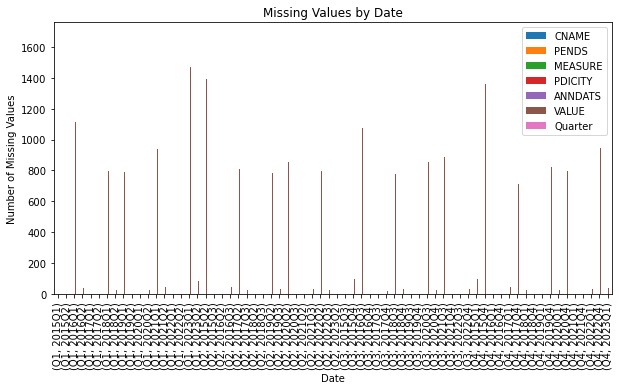

In [22]:
# Plotting the missing values by date
missing_values_by_date.plot(kind='bar', figsize=(10, 5))
plt.title('Missing Values by Date')
plt.xlabel('Date')
plt.ylabel('Number of Missing Values')
plt.show()

In [23]:
# Sort the DataFrame by 'OFTIC', 'MEASURE', and 'PENDS'
data_actual.sort_values(by=['OFTIC', 'MEASURE', 'PENDS'], inplace=True)

# Apply linear interpolation to fill missing values in the 'Value' column
data_actual['VALUE'].interpolate(method='linear', inplace=True)

# Display the updated DataFrame with missing values filled using linear interpolation
print(data_actual)


       OFTIC    CNAME      PENDS MEASURE PDICITY     ANNDATS       VALUE  \
71213      A  AGILENT 2015-01-31     BPS     QTR  2015-02-17    12.61010   
71214      A  AGILENT 2015-04-30     BPS     QTR  2015-05-18    12.48425   
71215      A  AGILENT 2015-07-31     BPS     QTR  2015-08-17    12.35840   
71216      A  AGILENT 2015-10-31     BPS     QTR  2015-11-16    12.51510   
71217      A  AGILENT 2016-01-31     BPS     QTR  2016-02-16    12.33230   
...      ...      ...        ...     ...     ...         ...         ...   
518414   ZTS   ZOETIS 2022-03-31     SAL     QTR  2022-05-05  1986.00000   
518415   ZTS   ZOETIS 2022-06-30     SAL     QTR  2022-08-04  2052.00000   
518416   ZTS   ZOETIS 2022-09-30     SAL     QTR  2022-11-03  2002.00000   
518417   ZTS   ZOETIS 2022-12-31     SAL     QTR  2023-02-14  2040.00000   
518418   ZTS   ZOETIS 2023-03-31     SAL     QTR  2023-05-04  2000.00000   

       Quarter  
71213       Q4  
71214       Q1  
71215       Q2  
71216       Q3  
71

In [24]:
for measure in measure_names:
    missing_count = data_actual[data_actual['MEASURE'] == measure]['VALUE'].isnull().sum()
    missing_values_counts[measure] = missing_count

# Print the number of missing values for each measure
print("Number of missing values for each measure:")
for measure, count in missing_values_counts.items():
    print(f"{measure}: {count}")

Number of missing values for each measure:
EPS: 0
BPS: 0
CPS: 0
CPX: 0
CSH: 0
DPS: 0
EBG: 0
EBI: 0
EBS: 0
EBT: 0
ENT: 0
EPX: 0
FFO: 0
GPS: 0
GRM: 0
NAV: 0
NDT: 0
NET: 0
OPR: 0
PRE: 0
ROA: 0
ROE: 0
SAL: 0


In [25]:
# Write the cleaned DataFrame to a new CSV file
data_actual.to_csv('cleaned_data.csv', index=False)

In [26]:
cleaned_data = pd.read_csv('cleaned_data.csv')
analyst_forecast = pd.read_csv('../../Data/Analyst Forecast.csv')

# Convert 'ANNDATS' column to datetime
analyst_forecast['ANNDATS'] = pd.to_datetime(analyst_forecast['ANNDATS'])

# Filter rows where 'ANNDATS' is greater than or equal to '2015-01-01'
analyst_forecast = analyst_forecast[analyst_forecast['ANNDATS'] >= '2015-01-01']
# Drop the 'TICKER' column from analyst_forecast
analyst_forecast = analyst_forecast.drop(columns='TICKER', errors='ignore')
# Drop the 'CNAME' column from analyst_forecast
analyst_forecast = analyst_forecast.drop(columns='CNAME', errors='ignore')
# Rename the 'VALUE' column to 'VALUE_ANALYST' in analyst_forecast
analyst_forecast = analyst_forecast.rename(columns={'VALUE': 'VALUE_ANALYST'})

In [27]:
# Define a function to generate the 'Quarter' column with year
def get_quarter_with_year(date):
    year = date.year
    quarter = None

    if 1 <= date.month <= 3:
        quarter = 'Q1'
    elif 4 <= date.month <= 6:
        quarter = 'Q2'
    elif 7 <= date.month <= 9:
        quarter = 'Q3'
    else:
        quarter = 'Q4'

    return f"{year}{quarter}"

# Create a new 'Quarter' column including the year and quarter information
analyst_forecast['Quarter'] = analyst_forecast['ANNDATS'].apply(get_quarter_with_year)

# Display the updated DataFrame with the new 'Quarter' column
print(analyst_forecast)

       OFTIC               ALYSNAM  VALUE_ANALYST  AMASKCD    ANNDATS Quarter
222        A  MEEHAN             J           44.0   180911 2015-01-06  2015Q1
223        A  COUILLARD          B           47.0   138700 2015-01-09  2015Q1
224        A  DE BRUIN           D           44.0    86687 2015-01-22  2015Q1
225        A  RO                 I           39.0    99673 2015-02-17  2015Q1
226        A  DE BRUIN           D           45.0    86687 2015-02-17  2015Q1
...      ...                   ...            ...      ...        ...     ...
404815   ZTS  CHESNEY            S          225.0   130921 2023-05-05  2023Q2
404816   ZTS  RICH               N          204.0   157521 2023-05-07  2023Q2
404817   ZTS  WESTENBERG         D          210.0   185530 2023-05-07  2023Q2
404818   ZTS  MAJUMDAR           I          190.0   194536 2023-06-08  2023Q2
404819   ZTS  HARDY              S          174.0   196139 2023-06-12  2023Q2

[287125 rows x 6 columns]


In [28]:
# Merge the two DataFrames on 'OFTIC' and 'Quarter'
merged_data = pd.merge(cleaned_data, analyst_forecast, on=['OFTIC', 'Quarter'], how='inner')

# Display or manipulate the merged data as needed
merged_data



,OFTIC,CNAME,PENDS,MEASURE,PDICITY,ANNDATS_x,VALUE,Quarter,ALYSNAM,VALUE_ANALYST,AMASKCD,ANNDATS_y


In [29]:
analyst_forecast

,OFTIC,ALYSNAM,VALUE_ANALYST,AMASKCD,ANNDATS,Quarter
222,A,MEEHAN J,44.0,180911,2015-01-06,2015Q1
223,A,COUILLARD B,47.0,138700,2015-01-09,2015Q1
224,A,DE BRUIN D,44.0,86687,2015-01-22,2015Q1
225,A,RO I,39.0,99673,2015-02-17,2015Q1
226,A,DE BRUIN D,45.0,86687,2015-02-17,2015Q1
...,...,...,...,...,...,...
404815,ZTS,CHESNEY S,225.0,130921,2023-05-05,2023Q2
404816,ZTS,RICH N,204.0,157521,2023-05-07,2023Q2
404817,ZTS,WESTENBERG D,210.0,185530,2023-05-07,2023Q2
404818,ZTS,MAJUMDAR I,190.0,194536,2023-06-08,2023Q2


In [92]:
cleaned_data

,OFTIC,CNAME,PENDS,MEASURE,PDICITY,ANNDATS,VALUE,Quarter,Year
0,A,AGILENT,2015-01-31,BPS,QTR,2015-02-17,12.61010,2015Q1,2015
1,A,AGILENT,2015-04-30,BPS,QTR,2015-05-18,12.48425,2015Q2,2015
2,A,AGILENT,2015-07-31,BPS,QTR,2015-08-17,12.35840,2015Q3,2015
3,A,AGILENT,2015-10-31,BPS,QTR,2015-11-16,12.51510,2015Q4,2015
4,A,AGILENT,2016-01-31,BPS,QTR,2016-02-16,12.33230,2016Q1,2016
...,...,...,...,...,...,...,...,...,...
254401,ZTS,ZOETIS,2022-03-31,SAL,QTR,2022-05-05,1986.00000,2022Q1,2022
254402,ZTS,ZOETIS,2022-06-30,SAL,QTR,2022-08-04,2052.00000,2022Q2,2022
254403,ZTS,ZOETIS,2022-09-30,SAL,QTR,2022-11-03,2002.00000,2022Q3,2022
254404,ZTS,ZOETIS,2022-12-31,SAL,QTR,2023-02-14,2040.00000,2022Q4,2022


In [93]:
# Write the merged data to a new CSV file
merged_data.to_csv('merged_data.csv', index=False)